# Reuters Dataset:


In [1]:
from keras.datasets import reuters

#Load the reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [13]:
#print(train_data[10])
print()
print(train_data.shape)
print(train_labels.shape)
print()
print(test_data.shape)
print(test_labels.shape)




(8982,)
(8982,)

(2246,)
(2246,)


Note: Each example is a list of integers (word indices)

Here’s how you can decode it back to words, in case you are curious:


In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [16]:
#decoded_newswire

##### Preparing the data - vectorize the data

In [17]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

**Note**: To vectorize the labels, there are two possibilities: we could just cast the label list as
an integer tensor, or we could use a "one-hot" encoding. One-hot encoding is a widely
used format for categorical data, also called "categorical encoding".

In our case,
one-hot encoding of our labels consists in embedding each label as an all-zero vector
with a 1 in the place of the label index, e.g.:

`def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
#Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
#Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)`

##### One-hot encoding the labels, the Keras way

In [27]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

(8982, 46)
(2246, 46)


##### Model definition


In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

**Note:** The `softmax` activation will output a probability distribution over the 46 different output classes. The 46 scores will sum to 1.

##### Compiling Model

In [30]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

##### Setting aside a validation set

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

##### Training Model

In [32]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.9797 - accuracy: 0.4489 - val_loss: 1.9703 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.6128 - accuracy: 0.6829 - val_loss: 1.4127 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 35ms/step - loss: 1.2148 - accuracy: 0.7440 - val_loss: 1.2111 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.9877 - accuracy: 0.7925 - val_loss: 1.0884 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8222 - accuracy: 0.8222 - val_loss: 1.0075 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6851 - accuracy: 0.8489 - val_loss: 0.9570 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5708 - accuracy: 0.8752 - val_loss: 0.9312 - val_accuracy: 0.7920
Epoch 8/20
16

##### Plotting the training and validation loss

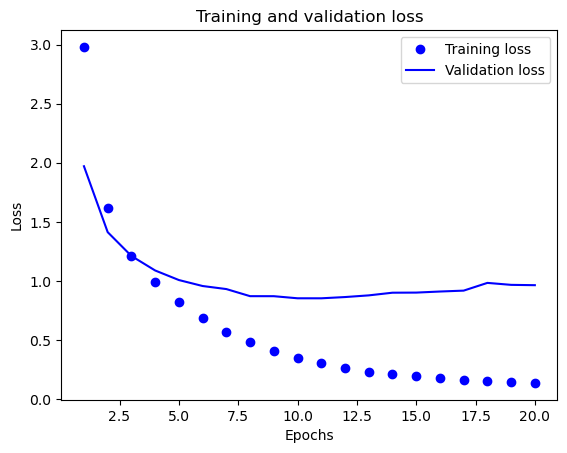

In [33]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Re-training a model from scratch

In [38]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 2.8051 - accuracy: 0.4934 - val_loss: 1.8231 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 1s 32ms/step - loss: 1.5360 - accuracy: 0.6912 - val_loss: 1.3598 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 1s 33ms/step - loss: 1.1596 - accuracy: 0.7590 - val_loss: 1.1888 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 1s 40ms/step - loss: 0.9461 - accuracy: 0.7980 - val_loss: 1.0775 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 1s 37ms/step - loss: 0.7853 - accuracy: 0.8353 - val_loss: 1.0069 - val_accuracy: 0.7830
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.6576 - accuracy: 0.8628 - val_loss: 0.9705 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.5476 - accuracy: 0.8885 - val_loss: 0.9144 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [39]:
results

[0.9564700126647949, 0.7818343639373779]